# 658. Find K Closest Elements

### Difficulty: <font color = orange> Medium </font>

---

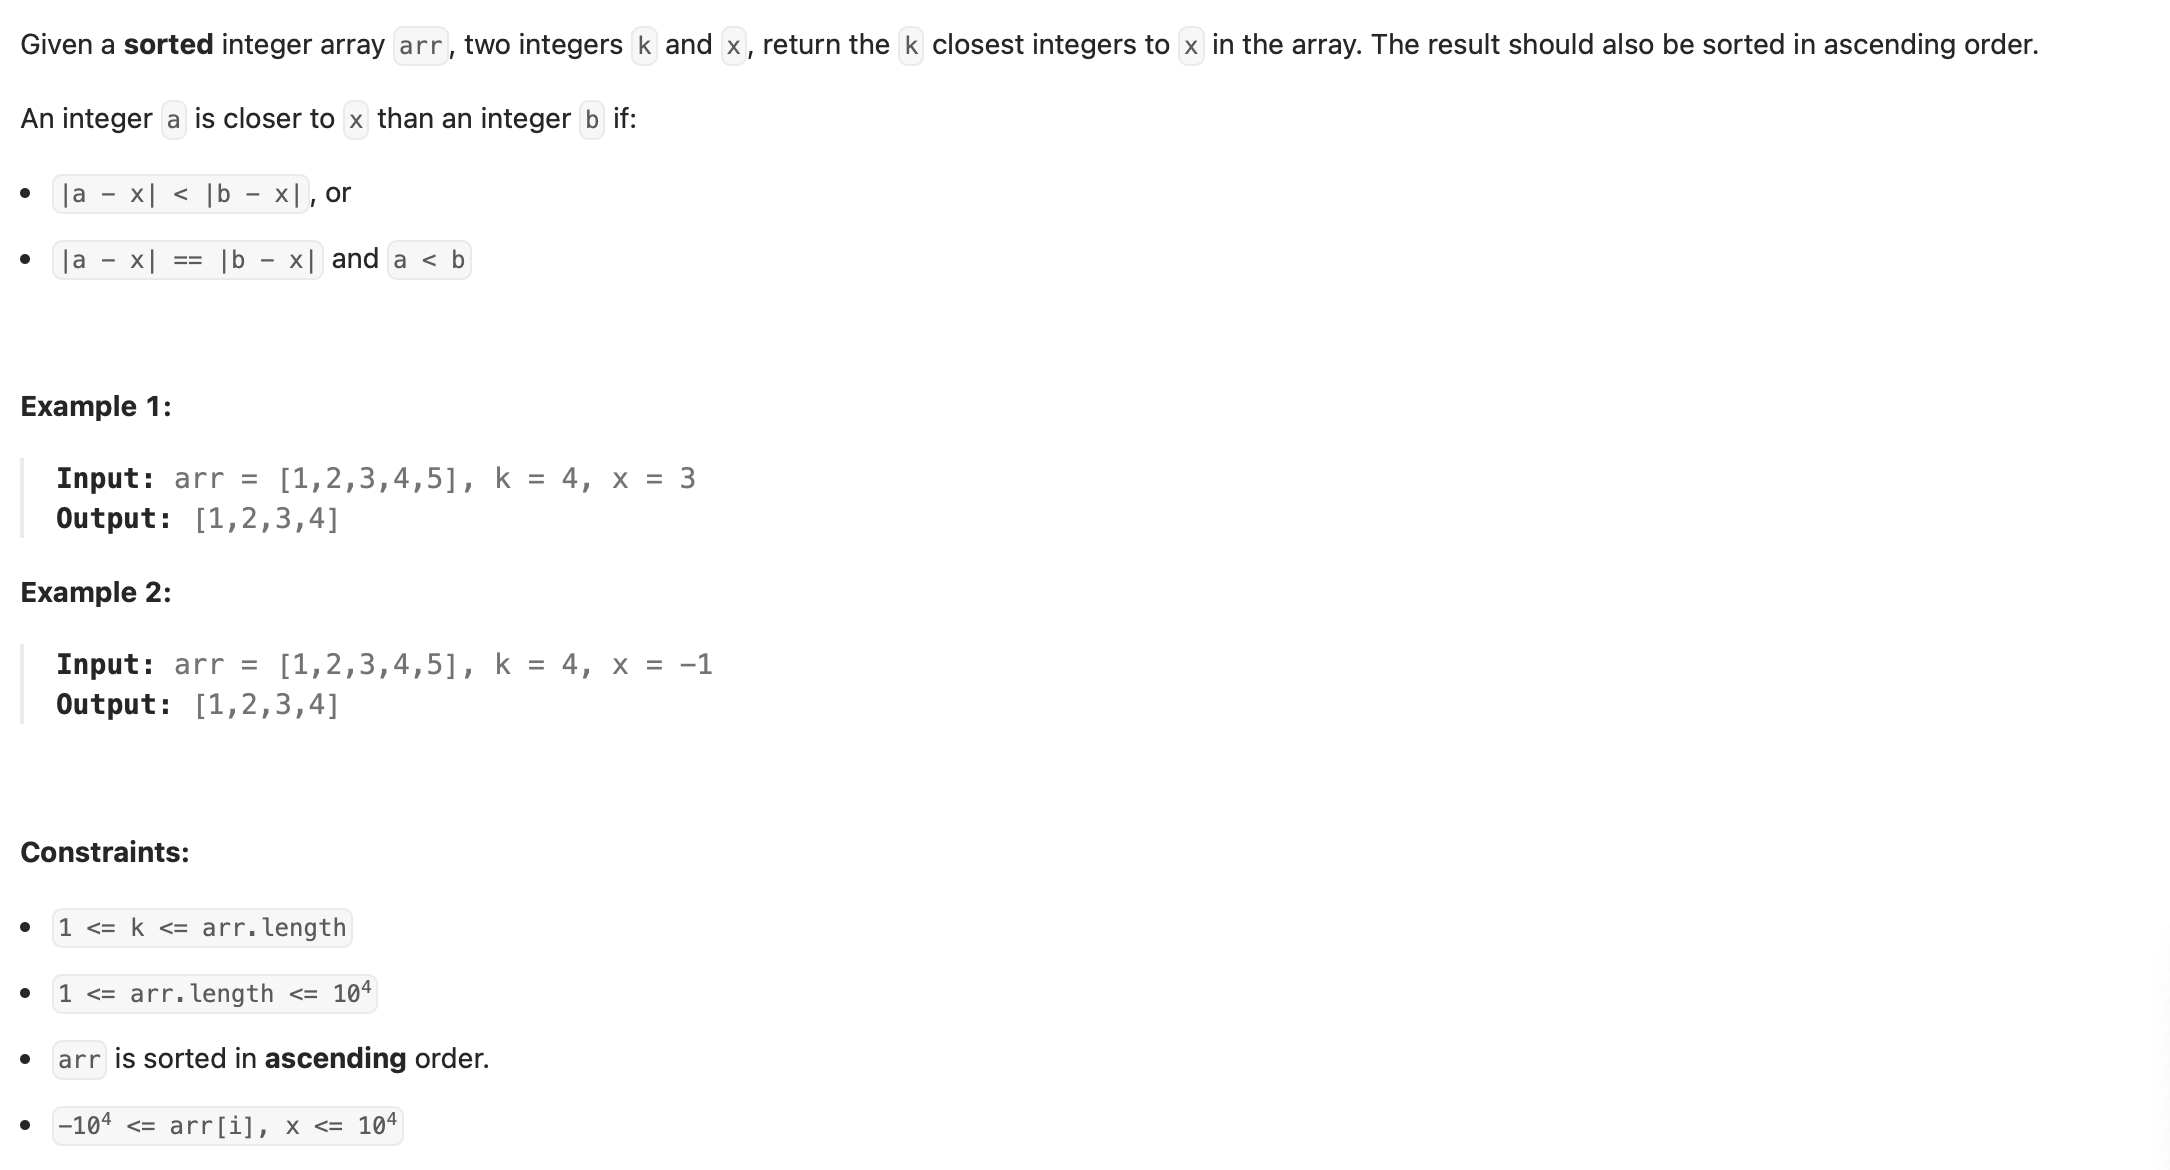

## Approach Overview:

Locate the position of the two elements in `arr` that's closest to `x` and use them as pointers to loop through `arr` to find the `k` elements closest to `x`. 

Every time we compare and find the closest element we then adjust the position of the respective pointer accordingly. 

## Detailed Explanation:

This was easy to manually work out but implementing it algorithmically was so hard. 

Okay so first things first we need to find out where the two elements in `arr` closest to `x` are located.

How?

Well we use binary search to find the position of the element in `arr` closest (`left` pointer) to `x`. 

And using this we find the position of the second element in `arr` closest to `x` (logically, this second closest element must be located on the right of the first closest element).

We initailize two pointers `left` and `right` to keep track of them, with `left` set equal to this index, and `right` equal to this index plus one.

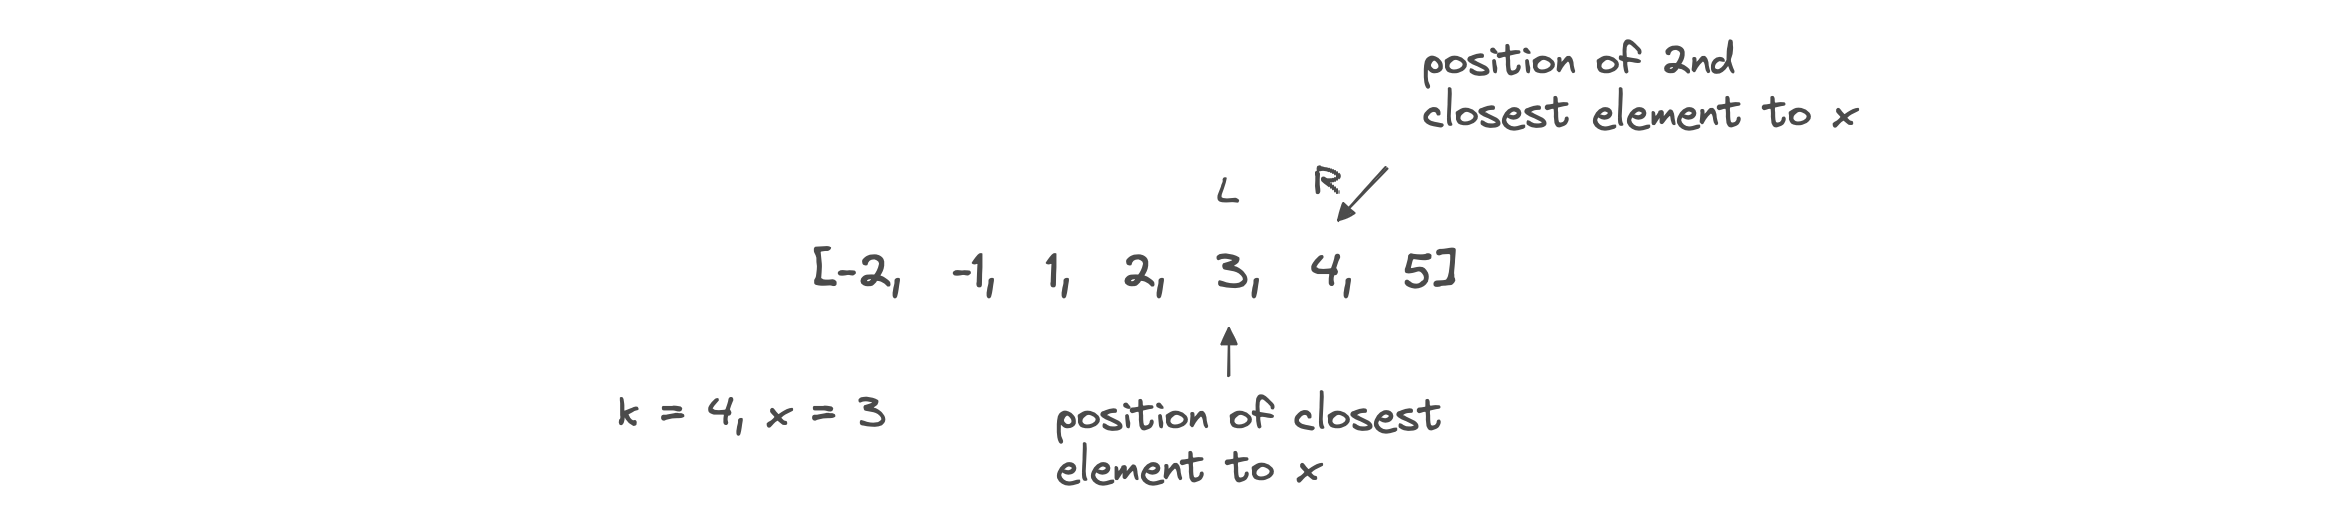


After we've identified their positions, we then calculate and check which has the shortest distance from `x` and then adjust the pointer's position accordingly inorder to look at the next closest element.

We do this `k` times and then return the slice of the input array / `arr` that contains the closest elements to `x`.


## Key Challenges:

1. Effectively handling the case for when the pointers are out of bounds of `arr` and how to implement the algorithm in those cases (turns out it's actually pretty simple). 


## Solution:

In [ ]:
class Solution:
    def findIndexOfClosestElement(self, array, targetValue):
        
        # initialize left and right pointer
        l, r = 0, len(array) - 1
        
        # continue until l and r pointers meet
        while l < r:
            
            # calculate mid-point of current search range
            mid = (l + r) // 2
            # check if mid element is greater than target value (x)
            if array[mid] > targetValue:
                # narrow search range by lowering the upper bound of the range
                r = mid
            else:
                # narrow search range by adjusting the lower bound of the range 
                l = mid + 1
        
        # edge case for when number of element in `arr` = k = 1
        if l == 0:
            # return the index of the element in `arr` closest to x
            return l
        
        # return the index of the element `arr` closest to x
        return l - 1

    def findClosestElements(self, arr: List[int], k: int, x: int) -> List[int]:

        # find the index of the element in `arr` that's closest to x    
        left = self.findIndexOfClosestElement(arr, x) 
        # initialize right (the index of the second closest number to x) 
        right = left + 1  

        # loop k times
        for _ in range(k):

            # check if right pointer is outside the bounds of `arr` OR if abs(arr[left] - x) <= abs(arr[right] - x)
            if right == len(arr) or abs(arr[left] - x) <= abs(arr[right] - x):
                # decrement left 
                left -= 1

            # otherwise, left == - 1 or abs(arr[left] - x) > abs(arr[right] - x)
            else: 
                # increment right
                right += 1
                
        # return k closest elements 
        return arr[left + 1: right]